# Assignment 3

Objective: improve overall sales performance

## Week 1

* the price at which they should sell particular products (Week 1)

1. What price should be set for the Lego sets with 8000 Lego pieces? (Simple linear regression)
2. What price should be set for the Lego sets with 8000 Lego pieces that are most likely to be purchased by 30-year-old customers? (Multiple linear regression)

In [20]:
# Import all the necessary packages
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [21]:
# Define directory
!pwd

/Users/hazel/Documents/LSE Data Analytics/Course 3 - Advanced Analytics/Assignment 3


In [22]:
# Assign variable
dir = '/Users/hazel/Documents/LSE Data Analytics/Course 3 - Advanced Analytics/Assignment 3/game_data/'

## 1. Import file

In [23]:
# Import data set
lego = pd.read_csv(dir + 'lego.csv')

In [24]:
# View data frame
lego.head()

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [25]:
# View metadata
lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [26]:
# Check for missing values
lego.isna().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

## 2. Print min and max to view distribution of values

In [27]:
# Descriptive statistics
lego.describe().round(2)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00,12261.00,12261.00,12261.00,12261.00,12261.00,12261.00
mean,16.69,65.14,14.60,493.41,3.71,1.99,10.02
std,8.22,91.98,34.36,825.36,1.64,1.79,6.19
min,0.00,2.27,0.00,1.00,0.00,0.00,0.00
25%,11.00,19.99,1.00,97.00,3.60,0.00,4.00
50%,19.00,36.59,4.00,216.00,4.40,2.00,10.00
75%,23.00,70.19,11.00,544.00,4.70,4.00,15.00
max,30.00,1104.87,367.00,7541.00,5.00,5.00,20.00


<AxesSubplot:>

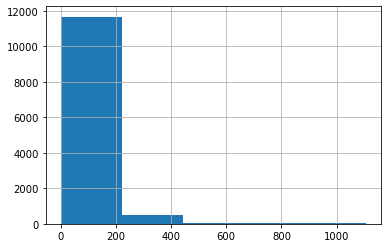

In [41]:
price = lego['list_price']

price.hist(bins=5)

<AxesSubplot:xlabel='piece_count', ylabel='list_price'>

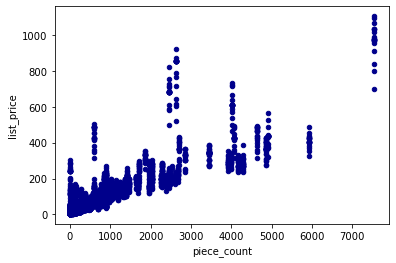

In [46]:
lego.plot.scatter(x='piece_count',
                      y='list_price',
                      c='DarkBlue')

According to histogram, the price is distributed at $200 or below.

According to the scatterplot, there is a positive correlation with price and pieces as the pieces increased, price also increased.

## 3. Define variables

In [58]:
# Independent variable
X = lego["piece_count"].values.reshape(-1, 1) 

# Dependent variable
y = lego["list_price"].values 

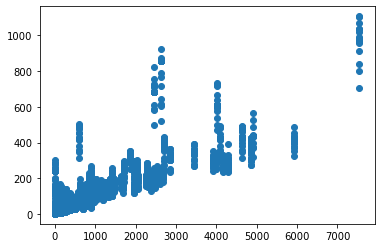

In [59]:
plt.scatter(X,y)

In [60]:
# Split the data into training = 0.7 and testing = 0.3 subsets
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=0)

## 5. Run a linear equation

In [61]:
# run linear regression
lr = LinearRegression()

In [62]:
# fit the model on the training data
lr.fit(x_train, y_train)

LinearRegression()

In [74]:
# predict is used for predicting on the x_test
y_pred = lr.predict(x_test)


## 6. Plot the regression

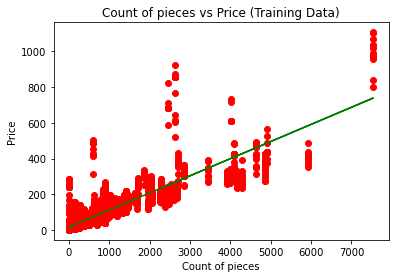

In [64]:
# Training Visualization
plt.scatter(x_train, y_train, color = "red")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Count of pieces vs Price (Training Data)")
plt.xlabel("Count of pieces")
plt.ylabel("Price")

plt.show()

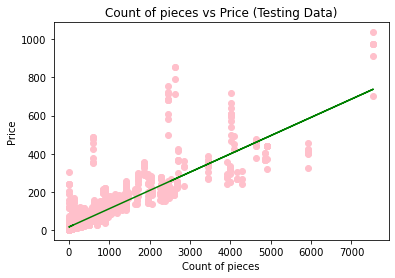

In [69]:
# Testing Visualisation
plt.scatter(x_test, y_test, color = "pink")
plt.plot(x_train, lr.predict(x_train), color = "green")
plt.title("Count of pieces vs Price (Testing Data)")
plt.xlabel("Count of pieces")
plt.ylabel("Price")

plt.show()

## 7. Print the values

In [70]:
# Print the R-squared value
print(lr.score(x_train,y_train))

0.7529271656910888


In [71]:
print("Intercept value: ", lr.intercept_)
print("Coffecient value: ", lr.coef_)

Intercept value:  17.634791702797564
Coffecient value:  [0.09553496]


#### Notes:
- The R-squared tells us that the model is explaining a fraction over 75% of the model.
- The intercept value of 17.63 tells us that as the low stat variable increases by 1, the predicted value of price increases by 17.63.

y = m (slope coefficient) x + c intercept 

In [78]:
# Optimal price for Lego product with 8000 lego pieces
y = (lr.coef_ * 8000) + lr.intercept_

# Print result
y

array([781.91443965])

## Notes with Giorgia

coefficient represent incliination of the line

python 
intercept 

beta is inclination 
x = 0 
beta disappears
y = alpha
intercept - is x is equal to 0 and y = c

mknimize error square 


## Multiple Linear regression

In [80]:
# Independent variable
X = lego[["piece_count", 'ages']]

# Dependent variable
y = lego["list_price"] 

In [81]:
# create train and test data sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [85]:
multi = LinearRegression()
multi.fit(x_train, y_train)

LinearRegression()

In [86]:
multi.predict(x_train)

array([27.20528336, 34.86283928, 38.53553834, ..., 28.40785609,
       26.10882184, 44.98887883])

In [87]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", multi.score(x_train, y_train))
print("Intercept: ", multi.intercept_)
print("Coefficients:")
list(zip(x_train, multi.coef_))

R-squared:  0.7592265700511804
Intercept:  16.323323751260915
Coefficients:


[('piece_count', 0.09664997537816367), ('ages', 0.05387695376202176)]

In [88]:
# make predictions
New_Value1 = 5.75
New_Value2 = 15.2
print ('Predicted Value: \n', multi.predict([[New_Value1 ,New_Value2]]))  

Predicted Value: 
 [17.69799081]


## 4. Training and testing subsets with MLR

In [89]:
model = sm.OLS(y_train, sm.add_constant(x_train)).fit()
Y_pred = model.predict(sm.add_constant(x_train))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                 1.546e+04
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        21:29:41   Log-Likelihood:                -51128.
No. Observations:                9808   AIC:                         1.023e+05
Df Residuals:                    9805   BIC:                         1.023e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.3233      1.075     15.179      

/Users/hazel/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
